In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [5]:
users = pd.read_csv('../data/users.csv')
places = pd.read_csv('../data/all_places.csv', encoding='MacRoman')
ratings = pd.read_csv('../data/ratings.csv')

# Step 1: Calculate the average rating for each place
average_ratings = ratings.groupby('Place ID')['Rating'].mean()

# Step 2: Merge average ratings with the places DataFrame
places = places.merge(average_ratings, left_on='id', right_index=True, how='left')

# Step 3: Rename the merged column to "average rating"
places = places.rename(columns={'Rating': 'Avg rating'})

# Step 4: Fill NaN values with a default value (e.g., 0)
places['Avg rating'] = places['Avg rating'].fillna(0)

places['price'] = places['price'].fillna(0)

# -------------------------------------------------------

# # Step 1: Calculate the rating count for each user
# rating_count = ratings.groupby('User ID')['Rating'].count()

# # Step 2: Merge the rating count with the users DataFrame
# users = users.merge(rating_count, left_on='id', right_index=True, how='left')

# # Step 3: Rename the merged column to "rating count"
# users = users.rename(columns={'Rating': 'rating_count'})

# # Step 4: Fill NaN values with 0 (for users with no ratings)
# users['rating count'] = users['rating_count'].fillna(0)

In [6]:
merged_df = pd.merge(ratings, places,left_on='Place ID',right_on='id')
merged_df = pd.merge(merged_df, users, left_on='User ID', right_on='id')
# users = merged_df[['User ID', 'age', 'gender', 'country', 'Place ID', 'Rating']]
# users

# Calculate average rating per place_type per user
avg_ratings = merged_df.groupby(['User ID', 'place_type'])['Rating'].mean().reset_index()

# Pivot the data to create columns for each place_type
avg_ratings_pivot = avg_ratings.pivot(index='User ID', columns='place_type', values='Rating')

# Add the new columns to merged_df
merged_df = merged_df.merge(avg_ratings_pivot, on='User ID')

# Rename the columns
merged_df.rename(columns={'Shopping': 'Shopping Avg',
                          'Hotel': 'Hotel Avg',
                          'Night': 'Night Avg',
                          'Old': 'Old Avg'}, inplace=True)

merged_df

,User ID,Place ID,Rating,id_x,name,address,city_id,location,desciption,time,...,email,gender,age,country,hotel,natural,night,old,restaurant,shopping
0,1,13,4,13,Maximo Shopping Center,"Via Laurentina, 865, 00143 Roma RM, Italy",1,41.810083544780966 12.486444743207326,Maximo Shopping Center is a modern retail comp...,5.0,...,wsparhawk0@va.gov,Female,37,Brazil,3.400000,3.571429,3.25,3.500000,3.545455,4.571429
1,1,47,5,47,La Reggia Designer Outlet,"S.S. Sannitica, 81025 Marcianise CE, Italy (ne...",3,41.006592213103936 14.321363645831704,La Reggia Designer Outlet: A large outlet mall...,3.0,...,wsparhawk0@va.gov,Female,37,Brazil,3.400000,3.571429,3.25,3.500000,3.545455,4.571429
2,1,58,4,58,Centro Direzionale,"Via Galileo Ferraris, 80142 Naples NA, Italy.",3,40.858385900986974 14.283541876067877,Centro Direzionale: A business district that a...,2.0,...,wsparhawk0@va.gov,Female,37,Brazil,3.400000,3.571429,3.25,3.500000,3.545455,4.571429
3,1,80,5,80,I Tre Mercanti,"Calle dei Fabbri, 1323, 30124 Venice, Italy",5,45.436382840786166 12.339383724477264,Elegant boutique carrying gourmet Italian food...,3.0,...,wsparhawk0@va.gov,Female,37,Brazil,3.400000,3.571429,3.25,3.500000,3.545455,4.571429
4,1,84,4,84,Ponte Vecchio,"Across the Arno River, Florence",4,43.76806443138688 11.253186411838058,Historic bridge with jewelry shops.,5.0,...,wsparhawk0@va.gov,Female,37,Brazil,3.400000,3.571429,3.25,3.500000,3.545455,4.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34539,500,616,4,616,Hotel Palazzo Esedra,"Piazza Giovanni Bovio 22, near the central tr...",3,40.83513338990712 14.24949648427931,NaN,NaN,...,sfolkesdv@ca.gov,Male,32,Portugal,3.384615,3.800000,4.00,4.454545,3.411765,3.642857
34540,500,617,5,617,Hotel Cavour,Situated in the historic center at Piazza Gar...,3,40.8531982444697 14.26837422334287,NaN,NaN,...,sfolkesdv@ca.gov,Male,32,Portugal,3.384615,3.800000,4.00,4.454545,3.411765,3.642857
34541,500,649,5,649,Hotel Royal San Marco,"S. Marco, 848, 30124 Venezia VE, Italy",5,45.43469546179546 12.337708262496605,NaN,NaN,...,sfolkesdv@ca.gov,Male,32,Portugal,3.384615,3.800000,4.00,4.454545,3.411765,3.642857
34542,500,650,5,650,Duodo Palace Hotel,"San Marco, Calle Minelli 1887-1888, 30124 Vene...",5,45.43445400477284 12.333902955750185,NaN,NaN,...,sfolkesdv@ca.gov,Male,32,Portugal,3.384615,3.800000,4.00,4.454545,3.411765,3.642857


In [11]:
ratings

,User ID,Place ID,Rating
0,1,13,4
1,1,47,5
2,1,58,4
3,1,80,5
4,1,84,4
...,...,...,...
34539,500,616,4
34540,500,617,5
34541,500,649,5
34542,500,650,5


In [72]:
Y = merged_df["Rating"].values
Xu = merged_df[['age', 'gender','country', 'hotel', 'natural',	'night',	'old',	'restaurant', 'shopping']]
Xp = merged_df[['place_type', 'Avg rating', 'price']]

Feature Extraction

In [73]:
label_encoder_gender = LabelEncoder()
label_encoder_country = LabelEncoder()
label_encoder_place_type = LabelEncoder()

label_encoder_gender.fit(Xu['gender'])
label_encoder_country.fit(Xu['country'])
label_encoder_place_type.fit(Xp['place_type'])

Xu['gender'] = label_encoder_gender.transform(Xu['gender'])
Xu['country'] = label_encoder_country.transform(Xu['country'])
Xp['place_type'] = label_encoder_place_type.transform(Xp['place_type'])

<ipython-input-73-14a820e1bb5b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xu['gender'] = label_encoder_gender.transform(Xu['gender'])
<ipython-input-73-14a820e1bb5b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xu['country'] = label_encoder_country.transform(Xu['country'])
<ipython-input-73-14a820e1bb5b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [74]:
# scale training data
item_train_unscaled = Xp
user_train_unscaled = Xu
y_train_unscaled = Y

scalerItem = StandardScaler()
scalerItem.fit(Xp)
item_train = scalerItem.transform(Xp)

scalerUser = StandardScaler()
scalerUser.fit(Xu)
user_train = scalerUser.transform(Xu)

scalerTarget = MinMaxScaler((-1, 1))
scalerTarget.fit(Y.reshape(-1, 1))
y_train = scalerTarget.transform(Y.reshape(-1, 1))

y_train

array([[0.5],
       [1. ],
       [0.5],
       ...,
       [1. ],
       [0.5],
       [0. ]])

In [75]:
item_train, item_test = train_test_split(item_train, train_size=0.80, shuffle=True, random_state=10000)
user_train, user_test = train_test_split(user_train, train_size=0.80, shuffle=True, random_state=10000)
y_train, y_test = train_test_split(y_train, train_size=0.80, shuffle=True, random_state=10000)
print(f"place/item training data shape: {item_train.shape}")
print(f"user train data shape: {user_train.shape}")
print(f"y train data shape: {y_train.shape}")

place/item training data shape: (27635, 3)
user train data shape: (27635, 9)
y train data shape: (27635, 1)


In [76]:
tf.random.set_seed(1)
user_NN = keras.models.Sequential([
    keras.layers.Dense(128 ,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64 ,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32)
])
user_NN

In [77]:
item_NN = tf.keras.models.Sequential([
    keras.layers.Dense(128 ,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64 ,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32)
])
item_NN

In [78]:
# create the user input and point to the base network
input_user = tf.keras.layers.Input(shape=(9))
vu = user_NN(input_user)
vu = tf.linalg.l2_normalize(vu, axis=1)
vu

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'tf.math.l2_normalize_4')>

In [79]:
# create the item input and point to the base network
input_item = tf.keras.layers.Input(shape=(3))
vm = item_NN(input_item)
vm = tf.linalg.l2_normalize(vm, axis=1)

In [80]:
# compute the dot product of the two vectors vu and vm
output = tf.keras.layers.Dot(axes=1)([vu, vm])

In [81]:
# specify the inputs and output of the model
model = tf.keras.Model([input_user, input_item], output)

In [82]:
cost_fn = tf.keras.losses.MeanSquaredError()
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss=cost_fn)

In [83]:
history = model.fit([user_train, item_train], y_train, epochs=20, validation_data=([user_test, item_test], y_test))

Epoch 1/20
864/864 [==============================] - 7s 6ms/step - loss: 0.2885 - val_loss: 0.2763
Epoch 2/20
864/864 [==============================] - 3s 4ms/step - loss: 0.2832 - val_loss: 0.2691
Epoch 3/20
864/864 [==============================] - 7s 8ms/step - loss: 0.2764 - val_loss: 0.2672
Epoch 4/20
864/864 [==============================] - 3s 3ms/step - loss: 0.2731 - val_loss: 0.2646
Epoch 5/20
864/864 [==============================] - 3s 3ms/step - loss: 0.2713 - val_loss: 0.2606
Epoch 6/20
864/864 [==============================] - 3s 4ms/step - loss: 0.2694 - val_loss: 0.2651
Epoch 7/20
864/864 [==============================] - 5s 6ms/step - loss: 0.2685 - val_loss: 0.2622
Epoch 8/20
864/864 [==============================] - 3s 4ms/step - loss: 0.2684 - val_loss: 0.2623
Epoch 9/20
864/864 [==============================] - 3s 3ms/step - loss: 0.2670 - val_loss: 0.2615
Epoch 10/20
864/864 [==============================] - 3s 4ms/step - loss: 0.2669 - val_loss: 0.2600

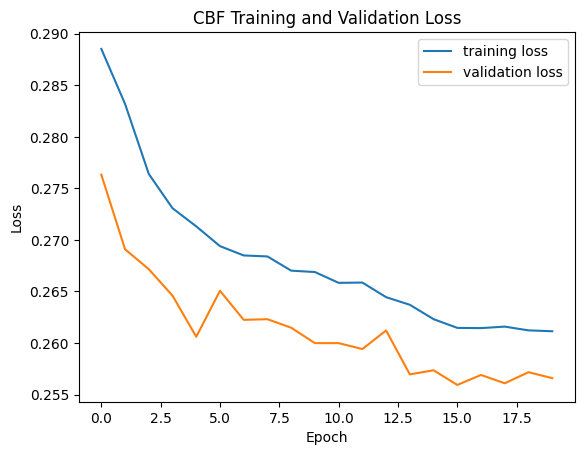

In [84]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CBF Training and Validation Loss')
plt.legend()
plt.show()

In [85]:
loss = model.evaluate([user_test, item_test], y_test)
loss

216/216 [==============================] - 0s 2ms/step - loss: 0.2566


0.25659605860710144

In [86]:
y_pred = model.predict([user_test, item_test])

216/216 [==============================] - 0s 2ms/step


In [87]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Evaluate the model
mse = mean_squared_error(scalerTarget.inverse_transform(y_test), scalerTarget.inverse_transform(y_pred))
print("Mean Squared Error:", mse)

Mean Squared Error: 1.0263845374375913


In [88]:
mae = mean_absolute_error(scalerTarget.inverse_transform(y_test), scalerTarget.inverse_transform(y_pred))
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.8106416214528693


In [93]:

# Compute the loss as a percentage
loss_percentage = (mae / 4) * 100

# Print the loss percentage
print(f"Loss Percentage: {loss_percentage:.2f}%")

Loss Percentage: 20.27%


In [38]:
# new user
age = 30
gender = 'Male'
country = 'China'
shopping = 0
natural = 0
old = 0
hotel = 0
night = 0
restaurant = 0

In [39]:
# Feature extraction
gender = label_encoder_gender.transform([gender])
country = label_encoder_country.transform([country])

In [40]:
user_vec = np.array([age, gender[0], country[0], shopping, natural, old, hotel, night, restaurant])
user_vec

array([30,  1, 15,  0,  0,  0,  0,  0,  0])

In [41]:
# generate and replicate the user vector to match the number movies in the data set.
user_vecs = np.tile(user_vec, (685, 1))
user_vecs.shape

(685, 9)

In [42]:
new_places_df = places

new_places_df['place_type'] = label_encoder_place_type.transform(new_places_df['place_type'])

item_vecs = np.array(places[['place_type','city_id','Avg rating','price']])

In [43]:
# scale our user and item vectors
suser_vecs = scalerUser.transform(user_vecs)
sitem_vecs = scalerItem.transform(item_vecs)
sitem_vecs.shape

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


(685, 4)

In [44]:
# make a prediction
y_p = model.predict([suser_vecs, sitem_vecs])

22/22 [==============================] - 0s 2ms/step


In [45]:
# unscale y prediction
y_pu = scalerTarget.inverse_transform(y_p)

In [46]:
# sort the results, highest prediction first
sorted_index = np.argsort(-y_pu,axis=0).reshape(-1).tolist()  #negate to get largest rating first
sorted_ypu   = y_pu[sorted_index]
sorted_items = item_vecs[sorted_index]  #using unscaled vectors for display

In [47]:
y_pu

array([[3.6711693],
       [3.4863195],
       [3.652411 ],
       [3.4867244],
       [3.7285407],
       [3.4666522],
       [3.5595384],
       [3.6660662],
       [3.4834144],
       [3.6460083],
       [3.613176 ],
       [3.4971232],
       [3.618102 ],
       [3.6308208],
       [3.5681763],
       [3.477666 ],
       [3.5772989],
       [3.551496 ],
       [3.7002974],
       [3.2784991],
       [3.5211024],
       [3.5255327],
       [3.5060706],
       [3.494553 ],
       [3.48926  ],
       [3.6455336],
       [3.517795 ],
       [3.7187245],
       [3.6355684],
       [3.6725476],
       [3.584896 ],
       [3.7115083],
       [3.551944 ],
       [3.5871553],
       [3.5023737],
       [3.536912 ],
       [3.5427482],
       [3.445975 ],
       [3.536912 ],
       [3.5503674],
       [3.464179 ],
       [3.5041664],
       [3.5108933],
       [3.7174325],
       [3.7108207],
       [3.5108933],
       [3.61629  ],
       [3.492074 ],
       [3.7290838],
       [3.7099214],


In [48]:
user_id = 2
exesting_user_ratings = ratings[ratings['User ID'] == user_id]
exesting_user_ratings = pd.merge(exesting_user_ratings, places,left_on='Place ID',right_on='id',how='outer').sort_values('id')
exesting_user_ratings['Rating'] = exesting_user_ratings['Rating'].fillna(0)
exesting_user_ratings

,User ID,Place ID,Rating,id,name,address,city_id,location,desciption,time,stars,food type,price,place_type,Avg rating
85,NaN,NaN,0.0,1,Galleria Alberto Sordi,Piazza Colonna 00187 Roma RM Italy,1,41.90122340938924 12.480575693552845,Galleria Alberto Sordi is a historic shopping ...,2.0,NaN,NaN,0.0,5,4.101695
86,NaN,NaN,0.0,2,Via del Corso,"Via del Corso, 00186 Roma RM, Italy",1,41.903369974944845 12.479473708895839,Via del Corso is one of the main shopping stre...,3.0,NaN,NaN,0.0,5,3.784314
0,2.0,3.0,2.0,3,Via Condotti,"Via dei Condotti, 00187 Roma RM, Italy",1,41.90533403993258 12.480541881910383,"Via Condotti is a prestigious street in Rome, ...",4.0,NaN,NaN,0.0,5,4.074074
87,NaN,NaN,0.0,4,La Rinascente,"Via del Tritone, 61, 00187 Roma RM, Italy",1,41.90600659996459 12.484760359092748,La Rinascente is a famous department store in ...,4.0,NaN,NaN,0.0,5,3.785714
88,NaN,NaN,0.0,5,Porta Portese Market,"Via di Porta Portese, 00153 Roma RM, Italy",1,41.87621365001004 12.467844220464272,Porta Portese Market is one of the largest fle...,5.0,NaN,NaN,0.0,5,4.192982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,NaN,NaN,0.0,681,Hotel Spadai,"Via dei Martelli 10, Florence",4,43.77535387810771 11.255842275212544,NaN,NaN,2.0,NaN,80.0,0,3.533333
681,NaN,NaN,0.0,682,Hotel Calzaiuoli,"Via Calzaiuoli 6, Florence",4,43.77144608141184 11.255318852315126,NaN,NaN,3.0,NaN,150.0,0,3.613636
682,NaN,NaN,0.0,683,Hotel degli Orafi,"Lungarno degli Archibusieri 4, Florence",4,43.768269830908004 11.254546367658591,NaN,NaN,5.0,NaN,350.0,0,3.467742
683,NaN,NaN,0.0,684,Hotel Loggiato dei Serviti,"Piazza Santissima Annunziata 3, Florence",4,43.77677915109262 11.259993496494953,NaN,NaN,4.0,NaN,200.0,0,3.705882


In [49]:
user_output = np.array(exesting_user_ratings['Rating'])
user_output

array([0., 0., 2., 0., 0., 0., 0., 0., 4., 0., 0., 4., 5., 0., 0., 4., 0.,
       2., 0., 0., 0., 0., 3., 0., 0., 0., 0., 5., 0., 0., 0., 3., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 5., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 4., 0., 0., 0., 0., 4., 0., 4., 0., 0.,
       0., 4., 0., 0., 0., 0., 0., 0., 5., 0., 0., 0., 4., 3., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3.,
       0., 3., 0., 0., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 4., 0., 0., 3., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 5., 0., 0., 0., 0., 0., 0., 0., 3., 0., 0., 4., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 0., 4., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 5., 0., 0., 3., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [50]:
exesting_user = merged_df[merged_df['User ID'] == user_id].head(1)
exesting_user['gender'] = label_encoder_gender.transform(exesting_user['gender'])
exesting_user['country'] = label_encoder_country.transform(exesting_user['country'])
exesting_user

,User ID,Place ID,Rating,id_x,name,address,city_id,location,desciption,time,...,email,gender,age,country,hotel,natural,night,old,restaurant,shopping
54,2,13,5,13,Maximo Shopping Center,"Via Laurentina, 865, 00143 Roma RM, Italy",1,41.810083544780966 12.486444743207326,Maximo Shopping Center is a modern retail comp...,5.0,...,talbery1@goo.gl,1,31,18,3.6875,3.076923,3.666667,4.636364,3.411765,3.631579


In [51]:
user_vec = np.array(exesting_user[['age', 'gender','country', 'hotel', 'natural',	'night',	'old',	'restaurant', 'shopping']])
user_vecs = np.tile(user_vec, (685, 1))

In [52]:
# scale our user and item vectors
suser_vecs = scalerUser.transform(user_vecs)
sitem_vecs = scalerItem.transform(item_vecs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [53]:
# make a prediction
y_p = model.predict([suser_vecs, sitem_vecs])

22/22 [==============================] - 0s 2ms/step


In [54]:
# unscale y prediction
y_pu = scalerTarget.inverse_transform(y_p)

In [55]:
y_pu

array([[3.6981788],
       [3.408342 ],
       [3.6596882],
       [3.4085207],
       [3.8311243],
       [3.4038217],
       [3.4928901],
       [3.687443 ],
       [3.407428 ],
       [3.6469917],
       [3.586369 ],
       [3.4181204],
       [3.5953517],
       [3.6187043],
       [3.507264 ],
       [3.4062204],
       [3.522461 ],
       [3.4823246],
       [3.761971 ],
       [3.3671951],
       [3.4421358],
       [3.4474127],
       [3.4248016],
       [3.4135902],
       [3.4090695],
       [3.6451957],
       [3.4381995],
       [3.805007 ],
       [3.6252499],
       [3.7017937],
       [3.5330122],
       [3.7877293],
       [3.478981 ],
       [3.5369978],
       [3.421226 ],
       [3.4609907],
       [3.467968 ],
       [3.411023 ],
       [3.4609907],
       [3.477091 ],
       [3.4081862],
       [3.4210913],
       [3.4277258],
       [3.8043656],
       [3.7886515],
       [3.4277258],
       [3.5877047],
       [3.4122334],
       [3.834002 ],
       [3.786535 ],


In [56]:
a = pd.DataFrame(data=[user_output,y_pu.flatten().round(1)])

In [57]:
print(a)

   0    1    2    3    4    5    6    7    8    9    ...  675  676  677  678  \
0  0.0  0.0  2.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0  ...  0.0  0.0  0.0  0.0   
1  3.7  3.4  3.7  3.4  3.8  3.4  3.5  3.7  3.4  3.6  ...  3.5  3.7  3.9  3.5   

   679  680  681  682  683  684  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  3.4  3.4  3.5  3.5  3.7  3.4  

[2 rows x 685 columns]


In [60]:
a = a.loc[:, (a.iloc[0] != 0)]

In [61]:
a

,2,8,11,12,15,17,22,27,31,41,...,602,603,604,618,623,624,627,635,641,659
0,2.0,4.0,4.0,5.0,4.0,2.0,3.0,5.0,3.0,1.0,...,3.0,3.0,3.0,5.0,5.0,2.0,2.0,4.0,5.0,4.0
1,3.7,3.4,3.4,3.6,3.4,3.5,3.4,3.8,3.8,3.4,...,3.6,3.5,3.8,3.7,3.7,3.4,3.7,3.7,3.8,3.7
